In [1]:
#COMET ML API KEY YarDlAXZLHepLKBFlSPyWbDPt
import comet_ml
comet_ml.config.save(api_key="YarDlAXZLHepLKBFlSPyWbDPt")
from comet_ml import Experiment
experiment = Experiment(
    api_key="YarDlAXZLHepLKBFlSPyWbDPt",
    project_name="asd-prediction-for-simplified-hyp-binary-classification",
    workspace="mattbeze",
)

Saving config to "C:\Users\mattbeze\.comet.config"... done!


COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mattbeze/asd-prediction/1ce93794a1d14b01aa26581f002c8614



In [2]:
import seaborn as sn
from imblearn.over_sampling import SMOTE 
import keras
from keras.utils import np_utils
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import losses
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import class_weight
from sklearn.metrics import recall_score, confusion_matrix, multilabel_confusion_matrix, precision_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from pandas import DataFrame
import xlsxwriter
import time

seed_value = 7
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

Using TensorFlow backend.


In [3]:
Training_Data = pd.ExcelFile("Labels.xlsx") #Training Data already pre-scaled to the IBIS Data set
data = Training_Data.parse(Training_Data.sheet_names[1])
label_data = Training_Data.parse(Training_Data.sheet_names[0])
data_features = data.loc[:, data.columns]
data_features = data_features.drop(['Case','Visit','MATCH','INDEX','ASD+','ASD-','Gender'], axis=1)
data_features = data_features.dropna()
data_features = data_features.drop(['Final Label'], axis=1)
labels = label_data.loc[:, label_data.columns]
labels = labels.drop(['CASE','MATCH','INDEX','ASD+','ASD-'], axis=1)
labels = labels.dropna()
print(data_features.shape)
print(labels.shape)

(325, 298)
(325, 1)


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_features)

scaled_data.shape
labels.shape

X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, labels, test_size=0.10, random_state=seed_value)
sm = SMOTE(sampling_strategy = 'minority', random_state = seed_value, k_neighbors=2) 
X_train_smoted, Y_train_smoted = sm.fit_sample(X_train, Y_train) #Only smote the training set.

print(X_train_smoted.shape)
print(Y_train_smoted.shape)

(484, 298)
(484, 1)


COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE
COMET INFO: Ignoring automatic log_parameter('do_validation') because 'keras:do_validation' is in COMET_LOGGING_PARAMETERS_IGNORE


Train on 484 samples, validate on 33 samples
Epoch 1/250
 35/484 [=>............................] - ETA: 9s - loss: 1.3158 - acc: 0.1143

COMET INFO: Ignoring automatic log_metric('batch_batch') because 'keras:batch_batch' is in COMET_LOGGING_METRICS_IGNORE
COMET INFO: Ignoring automatic log_metric('batch_size') because 'keras:batch_size' is in COMET_LOGGING_METRICS_IGNORE


484/484 [==============================] - 1s 2ms/step - loss: 1.4275 - acc: 0.7252 - val_loss: 1.9851 - val_acc: 0.0909
Epoch 2/250
484/484 [==============================] - 0s 145us/step - loss: 1.5866 - acc: 0.5000 - val_loss: 1.8605 - val_acc: 0.0909
Epoch 3/250
484/484 [==============================] - 0s 123us/step - loss: 1.5110 - acc: 0.5000 - val_loss: 1.5087 - val_acc: 0.0909
Epoch 4/250
484/484 [==============================] - 0s 109us/step - loss: 1.3880 - acc: 0.5000 - val_loss: 1.5637 - val_acc: 0.0909
Epoch 5/250
484/484 [==============================] - 0s 109us/step - loss: 1.3841 - acc: 0.5000 - val_loss: 1.6184 - val_acc: 0.0909
Epoch 6/250
484/484 [==============================] - 0s 125us/step - loss: 1.3860 - acc: 0.5000 - val_loss: 1.5955 - val_acc: 0.0909
Epoch 7/250
484/484 [==============================] - 0s 117us/step - loss: 1.3793 - acc: 0.5000 - val_loss: 1.5523 - val_acc: 0.0909
Epoch 8/250
484/484 [==============================] - 0s 116us/step 

484/484 [==============================] - 0s 120us/step - loss: 0.4386 - acc: 0.8740 - val_loss: 0.9493 - val_acc: 0.6061
Epoch 122/250
484/484 [==============================] - 0s 111us/step - loss: 0.4433 - acc: 0.8740 - val_loss: 1.0104 - val_acc: 0.6061
Epoch 123/250
484/484 [==============================] - 0s 147us/step - loss: 0.4265 - acc: 0.8781 - val_loss: 1.0659 - val_acc: 0.5758
Epoch 124/250
484/484 [==============================] - 0s 125us/step - loss: 0.4829 - acc: 0.8595 - val_loss: 0.9656 - val_acc: 0.6061
Epoch 125/250
484/484 [==============================] - 0s 166us/step - loss: 0.4419 - acc: 0.8678 - val_loss: 0.9303 - val_acc: 0.6364
Epoch 126/250
484/484 [==============================] - 0s 139us/step - loss: 0.3984 - acc: 0.8760 - val_loss: 0.8614 - val_acc: 0.6970
Epoch 127/250
484/484 [==============================] - 0s 152us/step - loss: 0.3476 - acc: 0.9029 - val_loss: 0.9765 - val_acc: 0.6364
Epoch 128/250
484/484 [==============================] 

Epoch 240/250
484/484 [==============================] - 0s 169us/step - loss: 0.0283 - acc: 0.9959 - val_loss: 1.1139 - val_acc: 0.8182
Epoch 241/250
484/484 [==============================] - 0s 118us/step - loss: 0.0236 - acc: 0.9959 - val_loss: 1.0375 - val_acc: 0.8182
Epoch 242/250
484/484 [==============================] - 0s 110us/step - loss: 0.0241 - acc: 0.9959 - val_loss: 1.0352 - val_acc: 0.8485
Epoch 243/250
484/484 [==============================] - 0s 115us/step - loss: 0.0141 - acc: 0.9979 - val_loss: 1.1096 - val_acc: 0.7879
Epoch 244/250
484/484 [==============================] - 0s 162us/step - loss: 0.0170 - acc: 0.9979 - val_loss: 1.1339 - val_acc: 0.8182
Epoch 245/250
484/484 [==============================] - 0s 155us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 1.1011 - val_acc: 0.8485
Epoch 246/250
484/484 [==============================] - 0s 137us/step - loss: 0.0158 - acc: 0.9979 - val_loss: 1.1966 - val_acc: 0.8182
Epoch 247/250
484/484 [==================

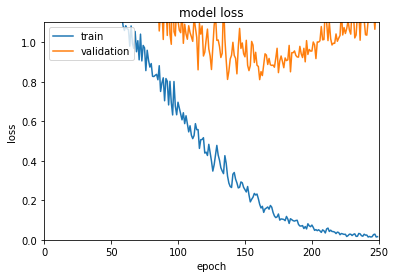

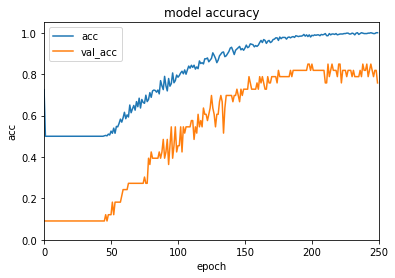

[[23  7]
 [ 1  2]]
PPV:  0.2222222222222222
Recall:  0.6666666666666666


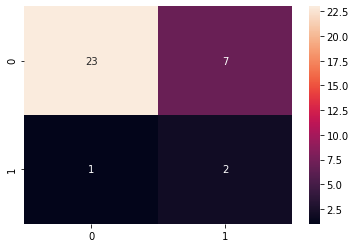

In [5]:
#Best: 0.497768 using {'batch_size': 35, 'dropout': 0.3, 'epochs': 100, 'layer1_size': 100, 'layer2_size': 20}
input_size = 298
hidden_size1 = 100
hidden_size2 = 20
output_size = 1

input_data = Input(shape=(input_size,))
hidden_d_1 = Dense(hidden_size1, activation='relu')(input_data)
hidden_d_1_d = Dropout(0.30,  noise_shape=None, seed=seed_value)(hidden_d_1)
hidden_d_2 = Dense(hidden_size2, activation='relu')(hidden_d_1_d)
predicted = Dense(output_size, activation='sigmoid')(hidden_d_2)

predictor = Model(input_data, predicted)
predictor.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'] )

class_weights={0:1, 1:5} 

p = predictor.fit(X_train_smoted, Y_train_smoted,
epochs=250,
batch_size=35,
shuffle=False,
validation_data=(X_test, Y_test), class_weight=class_weights)

#Plotting loss
plt.plot(p.history['loss'])
plt.plot(p.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 250, 0.0, 1.10])
plt.show()

#Plotting Accuracy
plt.plot(p.history['acc'])
plt.plot(p.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.axis([0, 250, 0.0, 1.05])
plt.show()


predictions = predictor.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

#Heatmap for the confusion matrix
cf_matrix = confusion_matrix(Y_test, predicted_classes)
print(cf_matrix)
sn.heatmap(cf_matrix, annot=True)
average_precision = average_precision_score(predicted_classes, Y_test)


prec_score = precision_score(Y_test, predicted_classes, average=None)
print('PPV: ',prec_score[1])

rec_score = recall_score(Y_test, predicted_classes, average=None)
print('Recall: ',rec_score[1])

In [6]:
#predictor.save('ASD Pre_Trained Model for ATP Contiguous')